### Importing Libraries

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import association_rules, apriori

In [6]:
data=pd.read_csv("D:/G-PYTHON/Python 42/Data science/Data Science Projects/Bakery Analisys/Dataset/Bakery.csv")
data

,TransactionNo,Items,DateTime,Daypart,DayType
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend
...,...,...,...,...,...
20502,9682,Coffee,2017-09-04 14:32:58,Afternoon,Weekend
20503,9682,Tea,2017-09-04 14:32:58,Afternoon,Weekend
20504,9683,Coffee,2017-09-04 14:57:06,Afternoon,Weekend
20505,9683,Pastry,2017-09-04 14:57:06,Afternoon,Weekend


### First, we check the database for empty values

In [7]:
data.isnull().sum()

TransactionNo    0
Items            0
DateTime         0
Daypart          0
DayType          0
dtype: int64

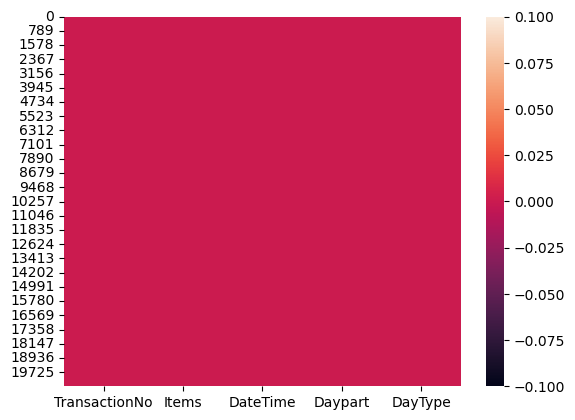

In [8]:
sns.heatmap(data.isnull())
plt.show()

### Let's learn data types

In [9]:
data.dtypes

TransactionNo     int64
Items            object
DateTime         object
Daypart          object
DayType          object
dtype: object

### Let's correct the column names

In [11]:
data.columns

Index(['TransactionNo', 'Items', 'DateTime', 'Daypart', 'DayType'], dtype='object')

In [12]:
data.rename(columns={"DataTime":"Date Time","Daypart":"Day Part","DayType":"Day Type"},inplace=True)
data

,TransactionNo,Items,DateTime,Day Part,Day Type
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend
...,...,...,...,...,...
20502,9682,Coffee,2017-09-04 14:32:58,Afternoon,Weekend
20503,9682,Tea,2017-09-04 14:32:58,Afternoon,Weekend
20504,9683,Coffee,2017-09-04 14:57:06,Afternoon,Weekend
20505,9683,Pastry,2017-09-04 14:57:06,Afternoon,Weekend


### With the DateTime column, divide by month, week, and hour

In [13]:
data["Year"]=pd.to_datetime(data["DateTime"]).dt.year
data["Month"]=pd.to_datetime(data["DateTime"]).dt.month
data["Week Day"]=pd.to_datetime(data["DateTime"]).dt.weekday
data["Hour"]=pd.to_datetime(data["DateTime"]).dt.hour

In [14]:
data

,TransactionNo,Items,DateTime,Day Part,Day Type,Year,Month,Week Day,Hour
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend,2016,10,6,9
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend,2016,10,6,10
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend,2016,10,6,10
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend,2016,10,6,10
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend,2016,10,6,10
...,...,...,...,...,...,...,...,...,...
20502,9682,Coffee,2017-09-04 14:32:58,Afternoon,Weekend,2017,9,0,14
20503,9682,Tea,2017-09-04 14:32:58,Afternoon,Weekend,2017,9,0,14
20504,9683,Coffee,2017-09-04 14:57:06,Afternoon,Weekend,2017,9,0,14
20505,9683,Pastry,2017-09-04 14:57:06,Afternoon,Weekend,2017,9,0,14


### Let's make some changes to the time division

In [15]:
### Replacing the names of the "Months"
data["Month"]=data["Month"].replace((1,2,3,4,5,6,7,8,9,10,11,12),('January','February' ,'March' ,'April' ,'May' ,'June' ,'July' ,'August' ,'September','October' ,'November' ,'December' ))
#### Replacing the names of the "Week Day"
data["Week Day"]=data["Week Day"].replace((0,1,2,3,4,5,6),('Monday','Tuesday' ,'Wednesday' ,'Thursday','Friday' ,'Saturday' ,'Sunday'))
### Changing hours
data["Hour"]=data["Hour"].replace((1, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23),('1-2','7-8','8-9','9-10','10-11','11-12','12-13','13-14','14-15','15-16','16-17','17-18','18-19','19-20','20-21','21-22','22-23','23-24'))

In [16]:
data

,TransactionNo,Items,DateTime,Day Part,Day Type,Year,Month,Week Day,Hour
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend,2016,October,Sunday,9-10
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend,2016,October,Sunday,10-11
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend,2016,October,Sunday,10-11
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend,2016,October,Sunday,10-11
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend,2016,October,Sunday,10-11
...,...,...,...,...,...,...,...,...,...
20502,9682,Coffee,2017-09-04 14:32:58,Afternoon,Weekend,2017,September,Monday,14-15
20503,9682,Tea,2017-09-04 14:32:58,Afternoon,Weekend,2017,September,Monday,14-15
20504,9683,Coffee,2017-09-04 14:57:06,Afternoon,Weekend,2017,September,Monday,14-15
20505,9683,Pastry,2017-09-04 14:57:06,Afternoon,Weekend,2017,September,Monday,14-15


### 15 best-selling products

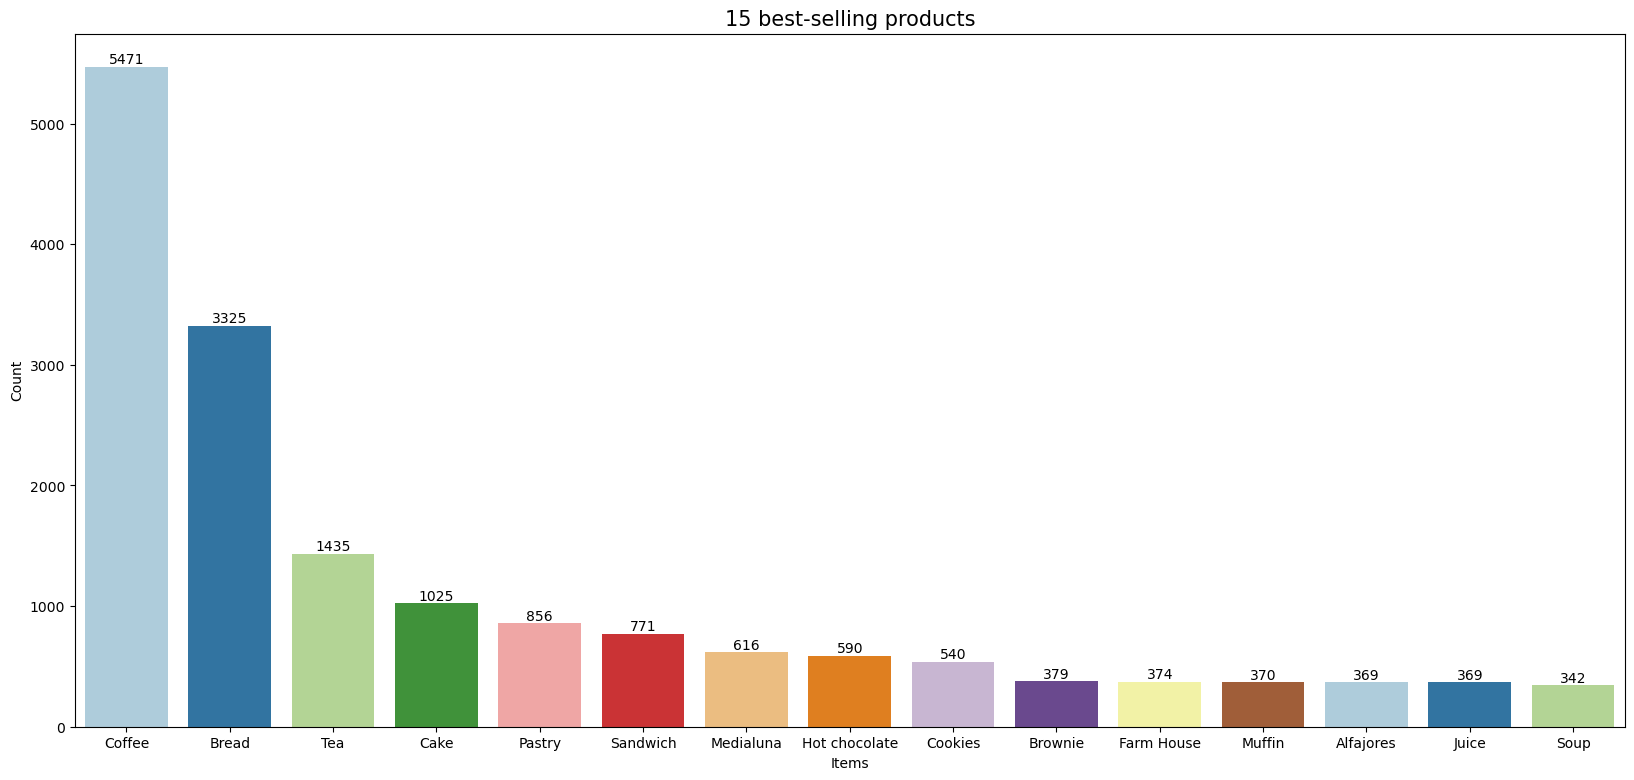

In [17]:
products=data["Items"].value_counts().head(15).reset_index(name="Count")
products=products.rename(columns={"index":"Items"})
plt.figure(figsize=(20,9))
colors=sns.color_palette("Paired")
ax=sns.barplot(x="Items",y="Count",data=products,palette=colors)
for i in ax.containers:
    ax.bar_label(i)
    plt.title("15 best-selling products",size=15)

### Sales by years

In [18]:
datayears=data.groupby("Year")["TransactionNo"].count().reset_index()
datayears

,Year,TransactionNo
0,2016,8144
1,2017,12363


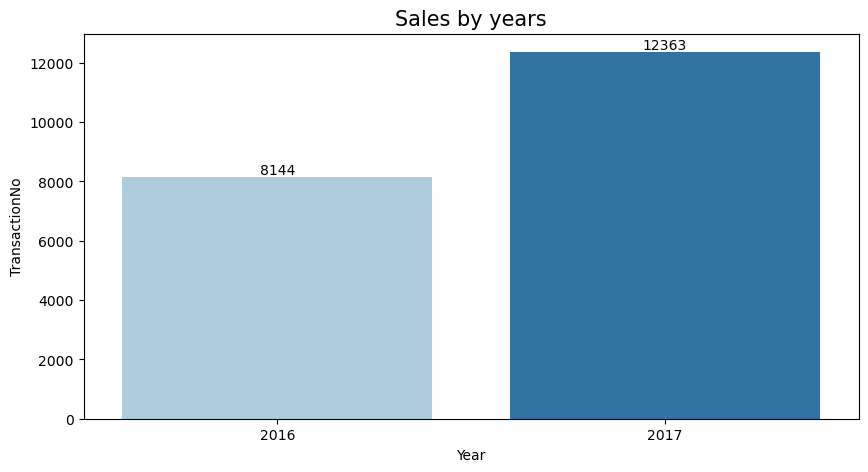

In [19]:
plt.figure(figsize=(10,5))
ax=sns.barplot(x="Year",y="TransactionNo",data=datayears,palette=colors)
for i in ax.containers:
    ax.bar_label(i)
    plt.title("Sales by years",size=15)

### Sales by Month

In [20]:
datamonth=data.groupby("Month")["TransactionNo"].count().reset_index()
datamonth

,Month,TransactionNo
0,April,1048
1,August,700
2,December,2647
3,February,2748
4,January,3027
5,July,741
6,June,739
7,March,3220
8,May,924
9,November,3076


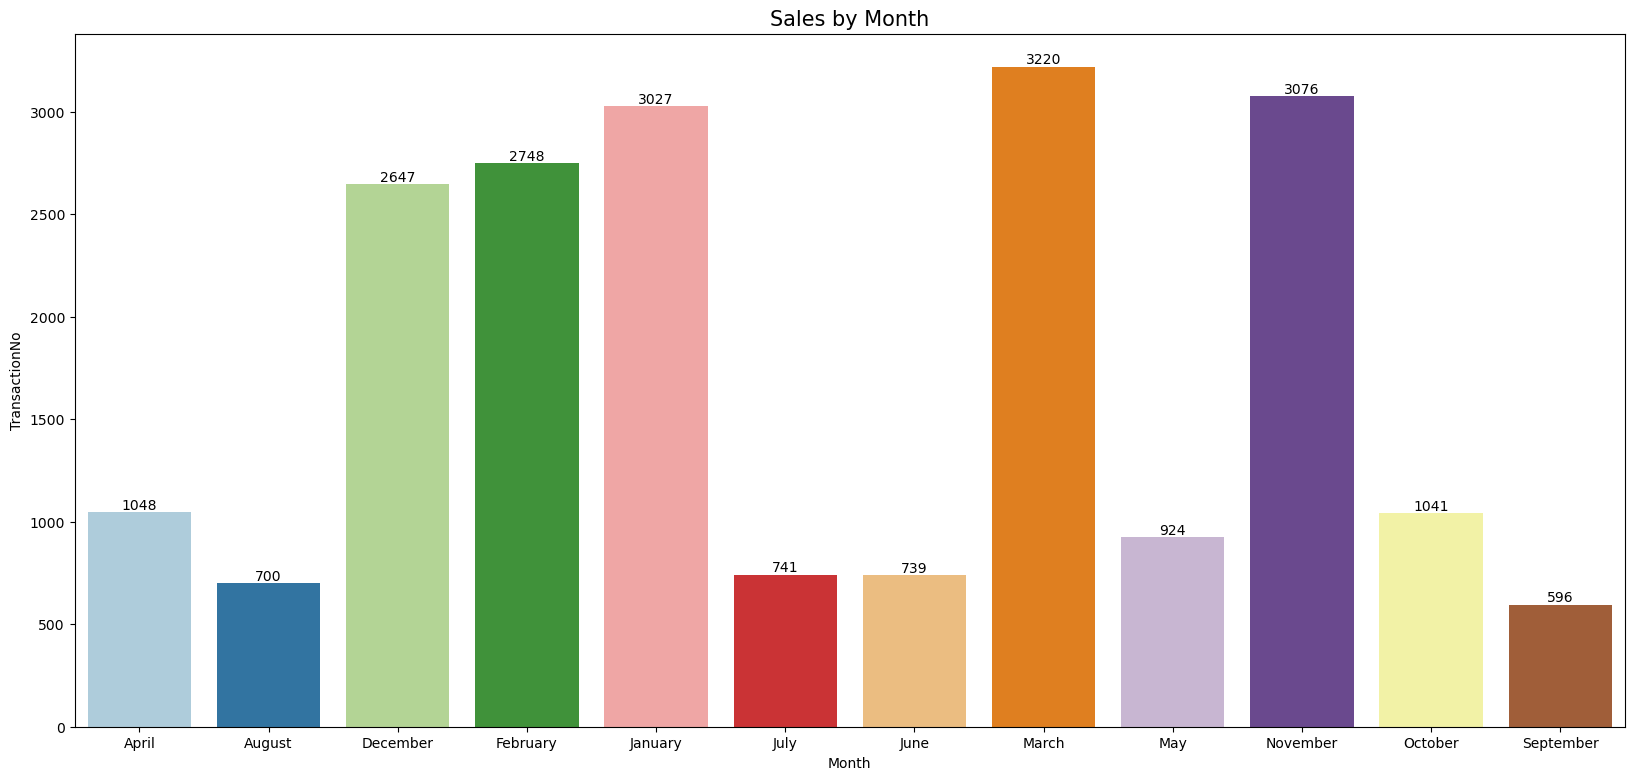

In [21]:
plt.figure(figsize=(20,9))
colors=sns.color_palette("Paired")
ax=sns.barplot(x="Month",y="TransactionNo",data=datamonth,palette=colors)
for i in ax.containers:
    ax.bar_label(i)
    plt.title("Sales by Month",size=15)

### Sales by Week Day

In [22]:
dataweek=data.groupby("Week Day")["TransactionNo"].count().reset_index()
dataweek

,Week Day,TransactionNo
0,Friday,3266
1,Monday,3035
2,Saturday,3554
3,Sunday,3118
4,Thursday,2601
5,Tuesday,2645
6,Wednesday,2288


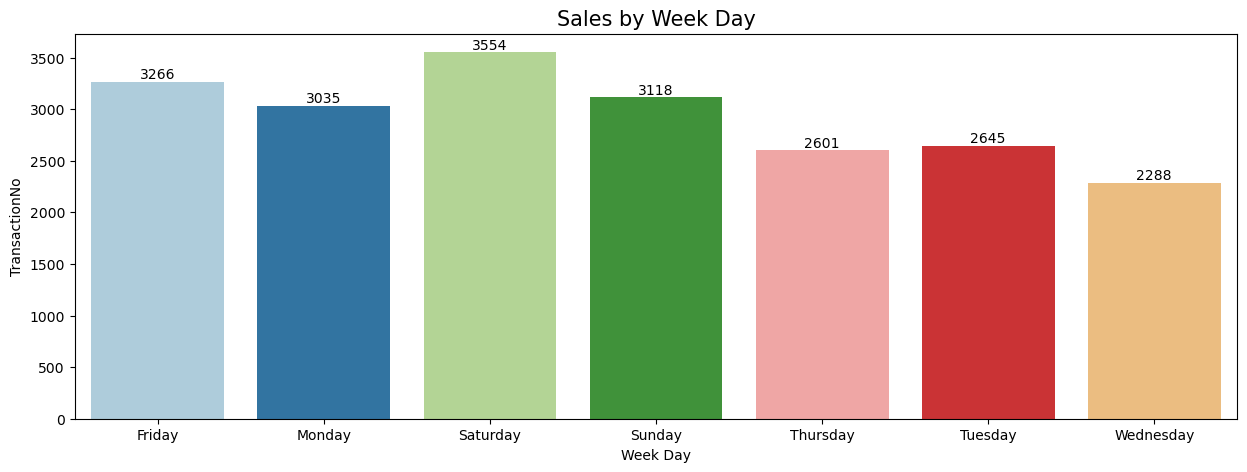

In [23]:
plt.figure(figsize=(15,5))
colors=sns.color_palette("Paired")
ax=sns.barplot(x="Week Day",y="TransactionNo",data=dataweek,palette=colors)
for i in ax.containers:
    ax.bar_label(i)
    plt.title("Sales by Week Day",size=15)

### Sales by Hour

In [24]:
datahour=data.groupby('Hour')["TransactionNo"].count().reset_index() 
datahour

,Hour,TransactionNo
0,1-2,1
1,10-11,2666
2,11-12,3102
3,12-13,2854
4,13-14,2617
5,14-15,2640
6,15-16,2115
7,16-17,1343
8,17-18,368
9,18-19,82


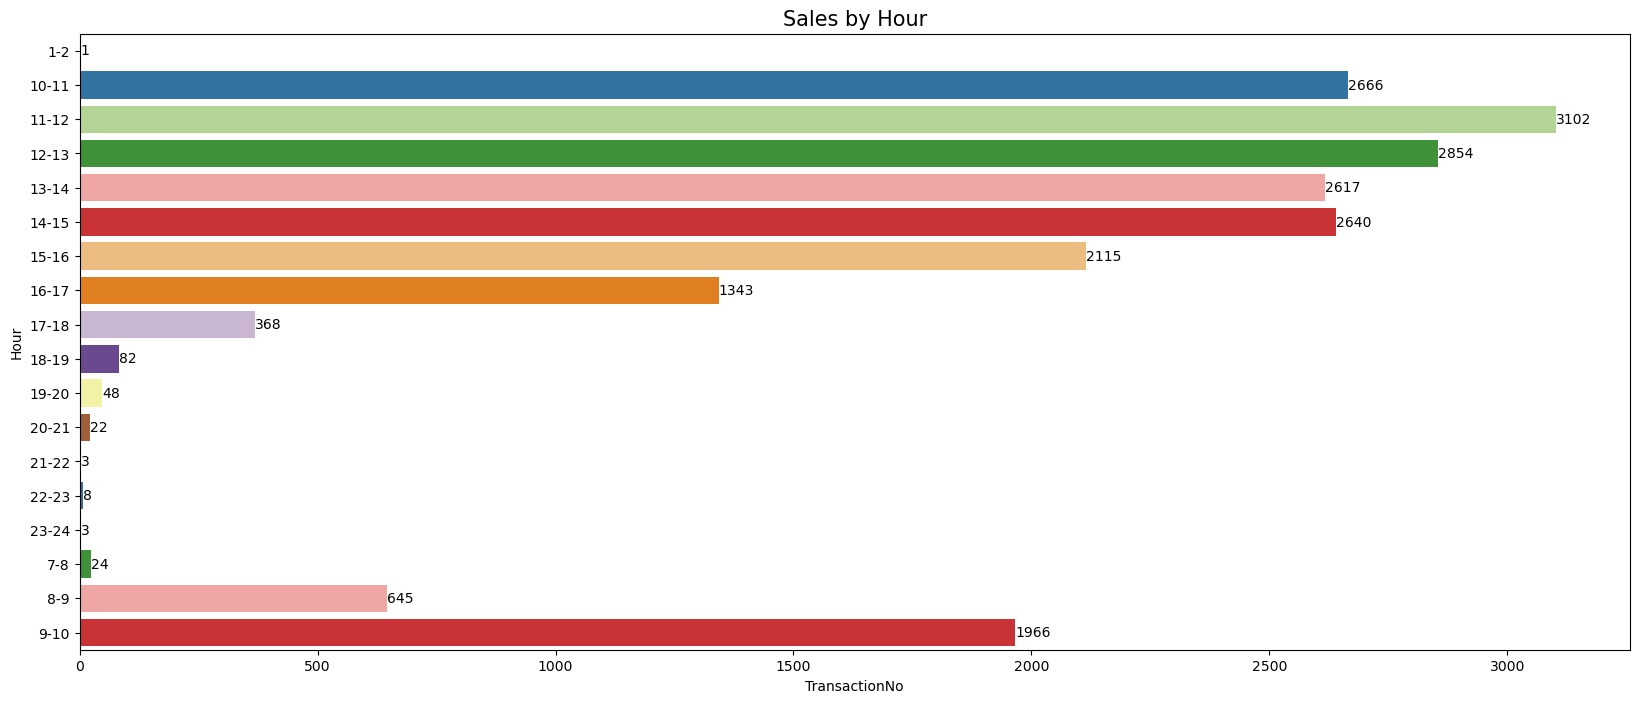

In [25]:
plt.figure(figsize=(20,8))
colors=sns.color_palette("Paired")
ax=sns.barplot(x="TransactionNo",y="Hour",data=datahour,palette=colors)
for i in ax.containers:
    ax.bar_label(i)
plt.title("Sales by Hour",size=15)
plt.show()

### Sales by Day Part

In [26]:
datapart=data.groupby("Day Part")["TransactionNo"].count().reset_index()
datapart

,Day Part,TransactionNo
0,Afternoon,11569
1,Evening,520
2,Morning,8404
3,Night,14


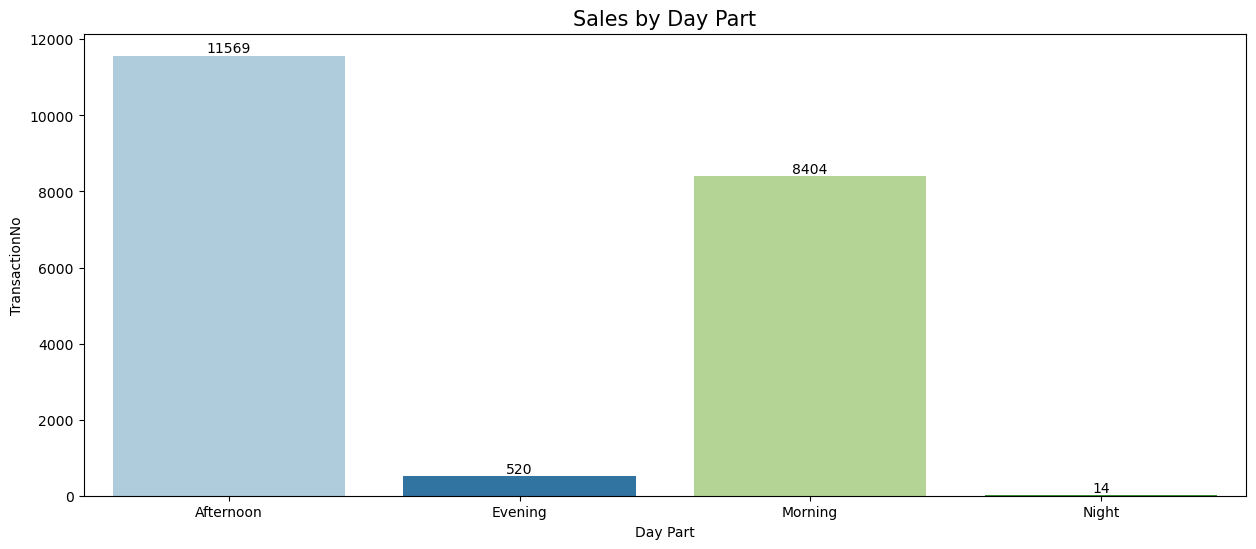

In [27]:
plt.figure(figsize=(15,6))
colors=sns.color_palette("Paired")
ax=sns.barplot(x="Day Part",y="TransactionNo",data=datapart,palette=colors)
for i in ax.containers:
    ax.bar_label(i)
plt.title("Sales by Day Part",size=15)
plt.show()

### Product sales by parts of the day

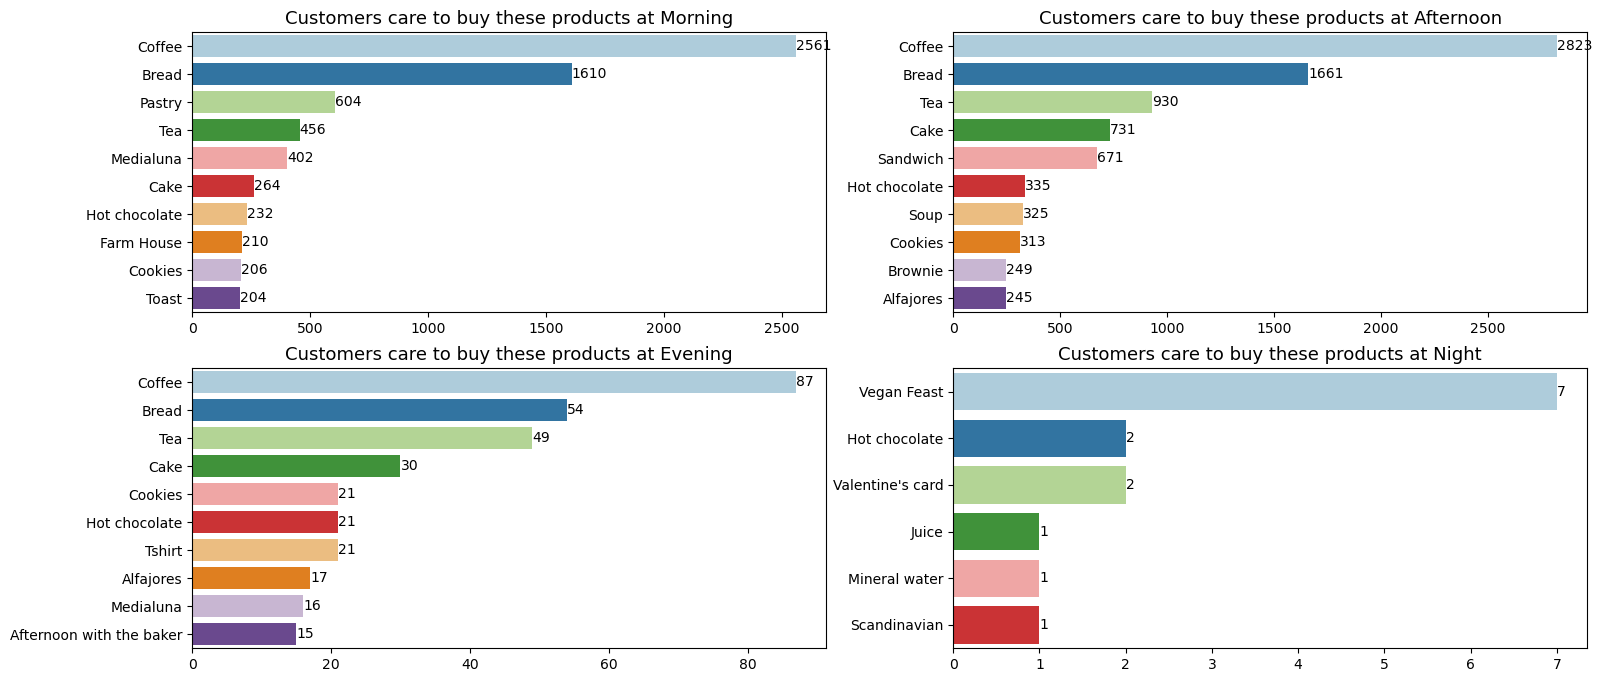

In [28]:
dataparts=data.groupby(["Day Part","Items"])["TransactionNo"].count().reset_index().sort_values(["Day Part","TransactionNo"],ascending=False)
dayss=['Morning', 'Afternoon', 'Evening', 'Night']

plt.figure(figsize=(18,8))
colors=sns.color_palette('Paired')
for i,j in enumerate(dayss):
    plt.subplot(2,2,i+1)
    partsdata=dataparts[dataparts["Day Part"]==j].head(10)
    ax=sns.barplot(data=partsdata,x="TransactionNo",y="Items",palette=colors)
    for i in ax.containers:
        ax.bar_label(i)
        plt.xlabel('')
        plt.ylabel('')
        plt.title('Customers care to buy these products at '"{}" .format(j),size=13)

### Product sales by months

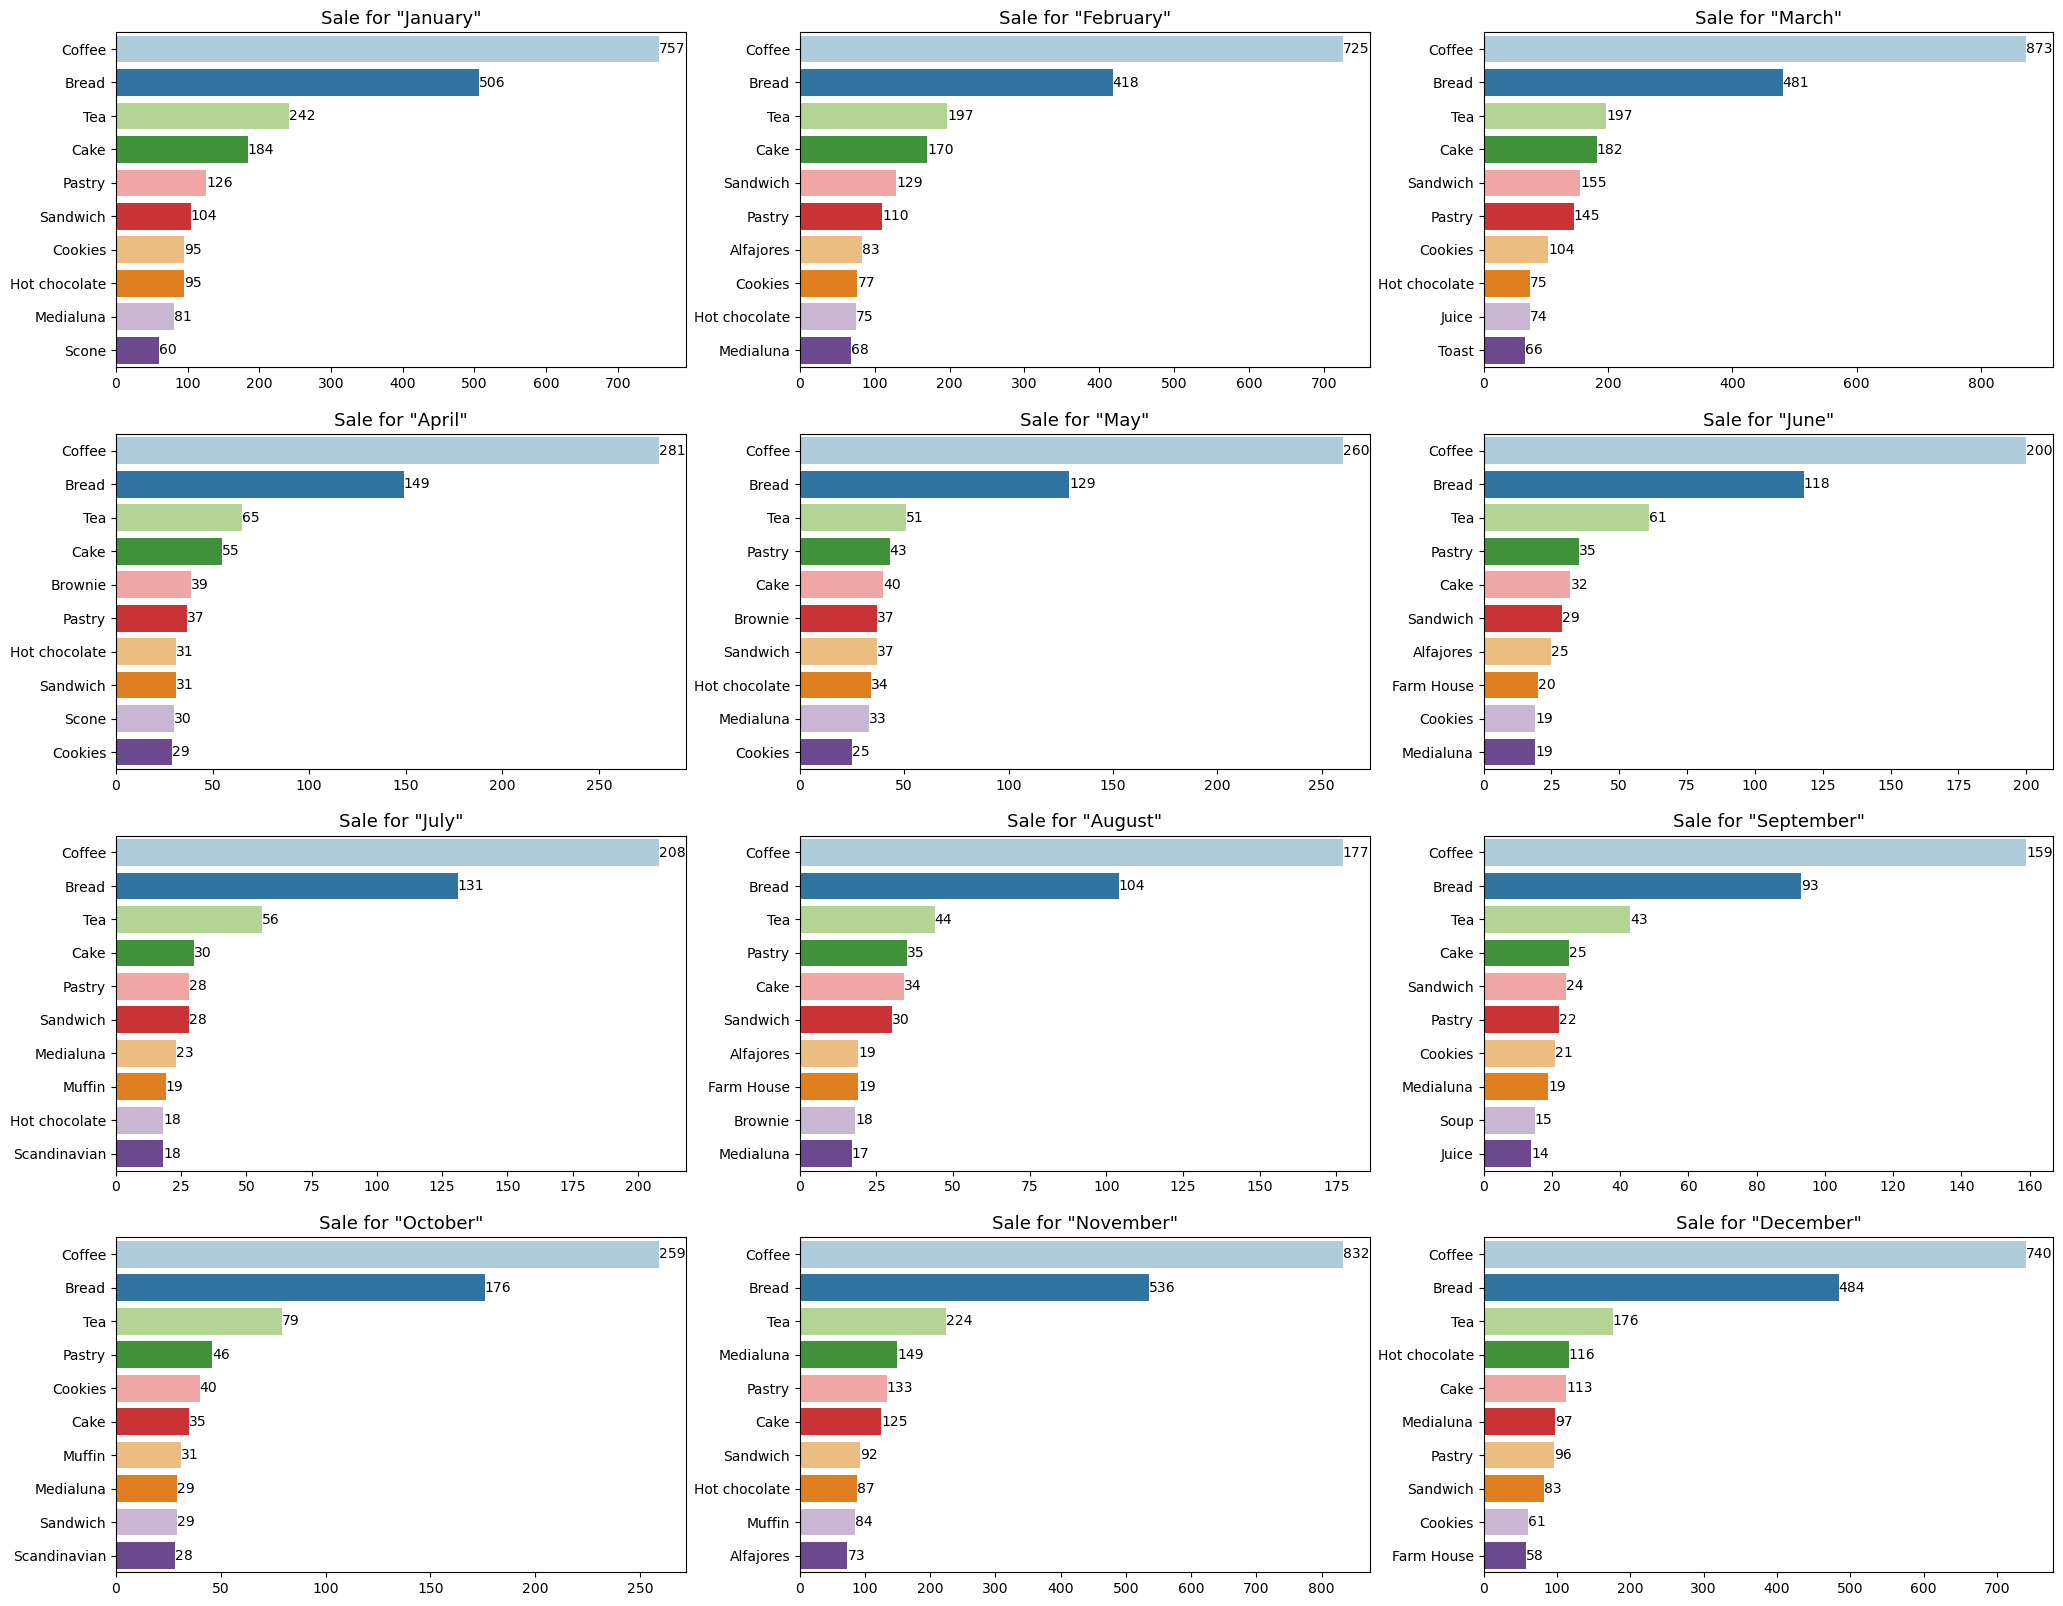

In [29]:
productmonths=data.groupby(["Month","Items"])["Items"].count().reset_index(name="Quantity").sort_values(["Month","Quantity"],ascending=False)
monthsales=['January', 'February', 'March', 'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(25,20))
colors=sns.color_palette('Paired')
for i,j in enumerate(monthsales):
    plt.subplot(4,3,i+1)
    pr=productmonths[productmonths["Month"]==j].head(10)
    ax=sns.barplot(data=pr,x="Quantity",y="Items",palette=colors)
    for i in ax.containers:
        ax.bar_label(i)
    plt.xlabel('')
    plt.ylabel('')
    plt.title('Sale for "{}"'.format(j), size=13)

### Apriori Algorithm

In [30]:
dataapriori=data.groupby(["TransactionNo","Items"])["Items"].count().reset_index(name="Quantity")
dataapriori

,TransactionNo,Items,Quantity
0,1,Bread,1
1,2,Scandinavian,2
2,3,Cookies,1
3,3,Hot chocolate,1
4,3,Jam,1
...,...,...,...
18882,9682,Tacos/Fajita,1
18883,9682,Tea,1
18884,9683,Coffee,1
18885,9683,Pastry,1


In [31]:
### Convert to Pivot Table
datapivot=dataapriori.pivot_table(index="TransactionNo",columns="Items",values="Quantity",aggfunc="sum").fillna(0)
datapivot

Items,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
TransactionNo,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9682,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
### You need to convert the data to 0 and 1 or True and False. Because the apriori algorithm works with them.
def table(x):
    if x<=0:
        return 0
    if x>=1:
        return 1

datapivottable=datapivot.applymap(table)
datapivottable

Items,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
TransactionNo,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9680,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9681,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9682,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
aprioridata=apriori(datapivottable,min_support=0.01,use_colnames=True)
aprioridata

D:\Anaconda\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.036344,(Alfajores)
1,0.016059,(Baguette)
2,0.327205,(Bread)
3,0.040042,(Brownie)
4,0.103856,(Cake)
...,...,...
56,0.023666,"(Coffee, Toast)"
57,0.014369,"(Tea, Sandwich)"
58,0.010037,"(Coffee, Bread, Cake)"
59,0.011199,"(Pastry, Coffee, Bread)"


In [34]:
rules=association_rules(aprioridata, metric = "lift", min_threshold = 1)
rules.sort_values("confidence",ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
31,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582
28,(Spanish Brunch),(Coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235
19,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
22,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
0,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
17,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919
25,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384
7,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
27,(Scone),(Coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366
13,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174


In [35]:
### antecedent support: Probability of purchasing the first product
### consequent support: Probability of getting the second product
### support: Probability of buying both products at the same time
### confidence: Probability of getting the second when the first product is purchased
### lift: When the first product was purchased, the probability of getting the second increased by several percent

# Thank You...